# Value at Risk using historical method for a one-asset and portfolio

"**Value at risk (VaR)** is a statistic that quantifies the extent of possible financial losses within a firm, portfolio, or position over a specific time frame. This metric is most commonly used by investment and commercial banks to determine the extent and probabilities of potential losses in their institutional portfolios. Risk managers use VaR to measure and control the level of risk exposure. One can apply VaR calculations to specific positions or whole portfolios or use them to measure firm-wide risk exposure.

The **historical method** looks at one’s prior returns history and orders them from worst losses to greatest gains—following from the premise that past returns experience will inform future outcomes."

Source: https://www.investopedia.com/terms/v/var.asp

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy import stats

# One-asset Value at Risk

In [ ]:
hist = yf.download('AAPL', start='2023-01-01', end='2024-01-01')
hist.drop(columns=['Open', 'Close', 'High', 'Low', 'Volume'], inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
hist['Returns'] = hist['Adj Close'].pct_change()
hist = hist.dropna(subset='Returns')

In [ ]:
hist

,Adj Close,Returns
Date,,
2023-01-04,125.657639,0.010314
2023-01-05,124.325081,-0.010605
2023-01-06,128.899521,0.036794
2023-01-09,129.426575,0.004089
2023-01-10,130.003342,0.004456
...,...,...
2023-12-22,193.600006,-0.005547
2023-12-26,193.050003,-0.002841
2023-12-27,193.149994,0.000518


## 0.95 confidence interval

We expect to lose no more than 1.718% of the value of our position, 95% of the time

In [ ]:
confidence_interval = 0.95
VaR = -np.percentile(hist['Returns'], 100 - (confidence_interval * 100))
print(VaR)

0.01717651358146146


## 0.99 confidence interval

We expect to lose no more than 2.802% of the value of our position, 99% of the time

In [ ]:
confidence_interval = 0.99
VaR = -np.percentile(hist['Returns'], 100 - (confidence_interval * 100))
print(VaR)

0.02801595124727271


## Distribution

Text(0.5, 0, 'Returns (%)')

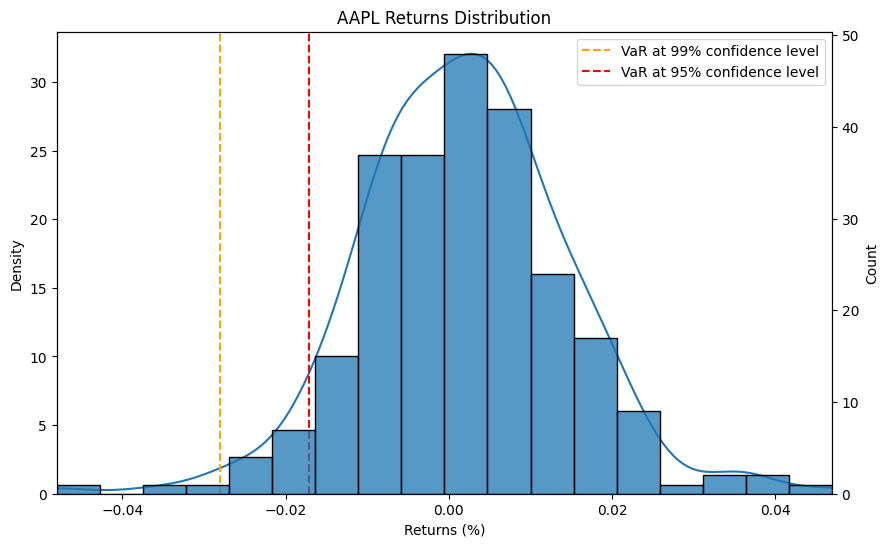

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=hist, x="Returns", ax=ax1)
ax1.set_xlim((hist["Returns"].min(), hist["Returns"].max()))
ax2 = ax1.twinx()
ax1.axvline(np.percentile(hist['Returns'], 1), 0, 1, color='orange', ls='--', label="VaR at 99% confidence level")
ax1.axvline(np.percentile(hist['Returns'], 5), 0, 1, color='red', ls='--', label="VaR at 95% confidence level")
sns.histplot(data=hist, x="Returns", bins=18, ax=ax2)
ax1.legend()
ax1.set_title('AAPL Returns Distribution')
ax1.set_xlabel('Returns (%)')

# Multi-asset Value at Risk for an equally weighted portfolio

In [ ]:
tickers = ['AAPL', 'MSFT', 'GOOG', 'META', 'TSLA']

df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start='2023-01-01', end='2024-01-01')
    df[ticker] = data['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,AAPL,MSFT,GOOG,META,TSLA
Date,,,,,
2023-01-03,124.374802,237.474335,89.699997,124.739998,108.099998
2023-01-04,125.657639,227.086456,88.709999,127.370003,113.639999
2023-01-05,124.325081,220.356110,86.769997,126.940002,110.339996
2023-01-06,128.899506,222.953079,88.160004,130.020004,113.059998
2023-01-09,129.426559,225.123840,88.800003,129.470001,119.769997
...,...,...,...,...,...
2023-12-22,193.600006,374.579987,142.720001,353.390015,252.539993
2023-12-26,193.050003,374.660004,142.820007,354.829987,256.609985
2023-12-27,193.149994,374.070007,141.440002,357.829987,261.440002


In [ ]:
returns = df.pct_change()
returns = returns.dropna()
returns

,AAPL,MSFT,GOOG,META,TSLA
Date,,,,,
2023-01-04,0.010314,-0.043743,-0.011037,0.021084,0.051249
2023-01-05,-0.010605,-0.029638,-0.021869,-0.003376,-0.029039
2023-01-06,0.036794,0.011785,0.016019,0.024263,0.024651
2023-01-09,0.004089,0.009736,0.007260,-0.004230,0.059349
2023-01-10,0.004456,0.007617,0.004955,0.027188,-0.007681
...,...,...,...,...,...
2023-12-22,-0.005547,0.002784,0.006488,-0.001977,-0.007701
2023-12-26,-0.002841,0.000214,0.000701,0.004075,0.016116
2023-12-27,0.000518,-0.001575,-0.009663,0.008455,0.018822


In [ ]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [ ]:
historical_returns = (returns * weights).sum(axis =1)
print(historical_returns)

Date
2023-01-04    0.005573
2023-01-05   -0.018905
2023-01-06    0.022703
2023-01-09    0.015241
2023-01-10    0.007307
                ...   
2023-12-22   -0.001191
2023-12-26    0.003653
2023-12-27    0.003312
2023-12-28   -0.005179
2023-12-29   -0.007322
Length: 249, dtype: float64


In [ ]:
days = 50

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2023-03-16    0.326000
2023-03-17    0.310985
2023-03-20    0.332512
2023-03-21    0.341047
2023-03-22    0.311002
                ...   
2023-12-22    0.064179
2023-12-26    0.086230
2023-12-27    0.077599
2023-12-28    0.071306
2023-12-29    0.082954
Length: 200, dtype: float64


## 0.99 confidence interval

We expect to lose no more than $65334.43 of the value of our position, 99% of the time

In [ ]:
confidence_interval = 0.99

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

65334.40834291362


## Distribution

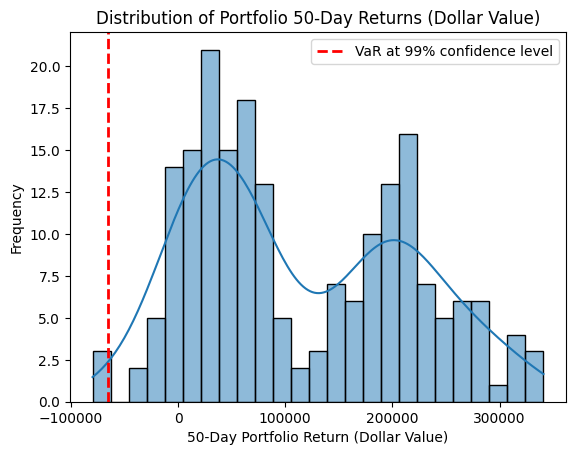

In [ ]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

sns.histplot(range_returns_dollar, bins=25, kde=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()